Shape of one row data:
(1478, 400)
(400,)
[ 6.66234127e+005  2.79610421e+009  4.20498314e+005  2.41865377e+008
  3.04773698e+008  1.33246825e+006  3.86984603e+009  1.44713157e+005
  1.52386849e+008  8.73782565e+007  3.15695362e+003  7.43765123e+008
  7.89238406e+002  2.69118920e+007  7.42702503e+006  1.11976212e+002
  1.41202081e+008 -2.53392831e+001  4.20498438e+005  1.66558532e+005
 -6.13452378e+001  1.62521540e+007 -1.49352368e+003  1.66558594e+005
  3.26886598e+238  3.00489544e-307  9.37908771e-196 -3.73651724e-230
  3.44209773e+012 -2.60706991e-003 -4.09624439e+005  3.76807813e+005
 -4.09624312e+005  1.49925685e+000  7.69178751e-011 -2.48502969e+005
  3.33117063e+005 -6.44486124e+005  5.82961919e-001 -1.87593014e-001
 -3.27699551e+006  4.94857320e+003 -3.27699550e+006  1.01634578e-004
 -4.00119096e+001 -2.57794551e+006  5.05112576e+004 -5.15589100e+006
 -2.60707132e-003 -1.01357132e+002 -2.92747151e+006  1.44713156e+005
 -7.95209498e+006 -2.53392907e+001 -6.11259167e-005 -7.318678

/Users/antonvasilev/PyCharmProjects/emg-interface/venv/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Epoch 1/50
16/16 [==============================] - 4s 147ms/step - loss: 2.2277 - accuracy: 0.1180 - val_loss: 2.2068 - val_accuracy: 0.1194
Epoch 2/50
16/16 [==============================] - 2s 109ms/step - loss: 2.2225 - accuracy: 0.1035 - val_loss: 2.1781 - val_accuracy: 0.1306
Epoch 3/50
16/16 [==============================] - 2s 116ms/step - loss: 2.2253 - accuracy: 0.0986 - val_loss: 2.1934 - val_accuracy: 0.1351
Epoch 4/50
16/16 [==============================] - 2s 115ms/step - loss: 2.2301 - accuracy: 0.1054 - val_loss: 2.2783 - val_accuracy: 0.0541
Epoch 5/50
16/16 [==============================] - 2s 111ms/step - loss: 2.2148 - accuracy: 0.1286 - val_loss: 2.2339 - val_accuracy: 0.0721
Epoch 6/50
16/16 [==============================] - 2s 109ms/step - loss: 2.2044 - accuracy: 0.1161 - val_loss: 2.2259 - val_accuracy: 0.0721
Epoch 7/50
16/16 [==============================] - 2s 112ms/step - loss: 2.2199 - accuracy: 0.1141 - val_loss: 2.2131 - val_accuracy: 0.1374
Epoch 

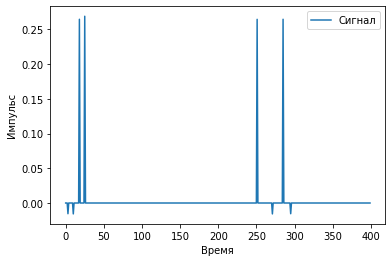

In [127]:

from src.data_manager.rflab_np_manager import RflabNpDataManager
import numpy as np
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, BatchNormalization, LSTM, Conv1D, Reshape, Dropout
from keras.datasets import imdb
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

np.random.seed(42)

np.set_printoptions(suppress=True)


rflab_manager = RflabNpDataManager()
dataset = rflab_manager.load()

X_train = dataset[2:, 0:-1]
X_train[np.isnan(X_train)] = 0.
print('Shape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 400, 1))
print('ReShape of one row data:')
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

print('before nornalize')
print(X_train[0])
row_sums = X_train.sum(axis=1)
X_train = X_train / row_sums[:, np.newaxis]
print('after nornalize')
print(X_train[0])

Y_train = dataset[2:, -1]
print('Class labels:')
print(np.unique(Y_train))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(Y_train, num_classes=9)
print(one_hot_labels.shape)
print(np.unique(one_hot_labels))

model = Sequential()
num_classes = 9
time_series = X_train.shape[1]
model.add(Reshape((400, 1), input_shape=(400,)))
model.add(SimpleRNN(64, input_shape=(None, 400, 1), return_sequences=True))
model.add(SimpleRNN(8))
# model.add(Dense(1024, input_dim=400, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, one_hot_labels, epochs=50, batch_size=65, validation_split=0.3)
y_pred = model.predict(X_train[0:1])
# print(X_train[0:1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)

plt.plot(X_train[140],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')

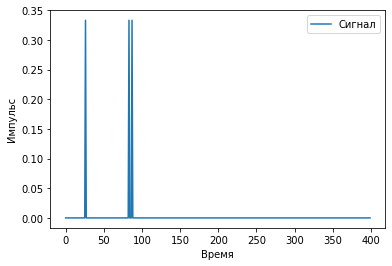

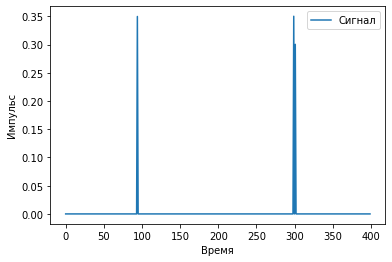

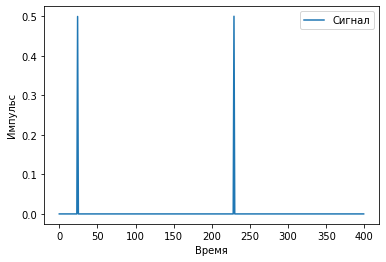

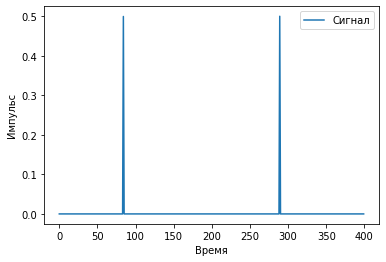

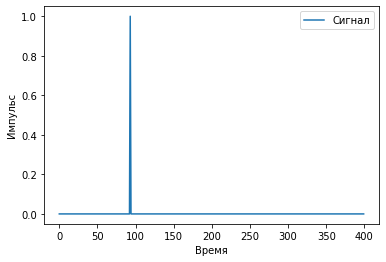

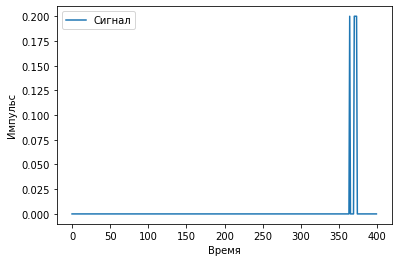

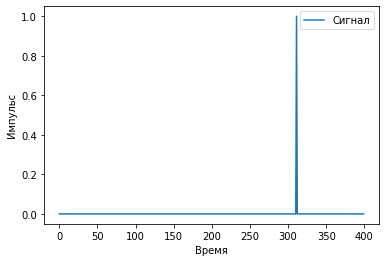

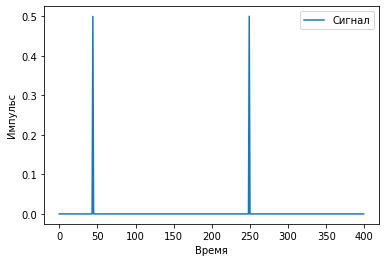

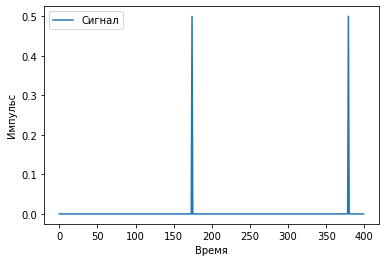

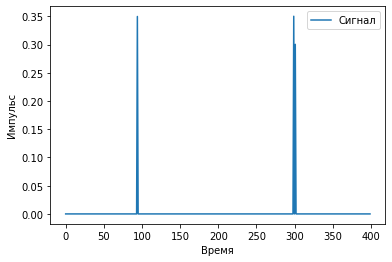

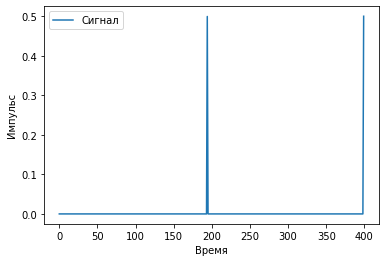

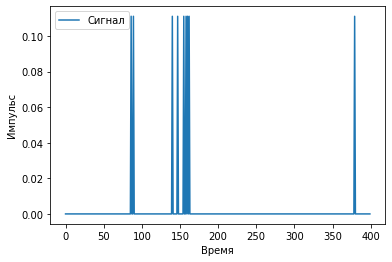

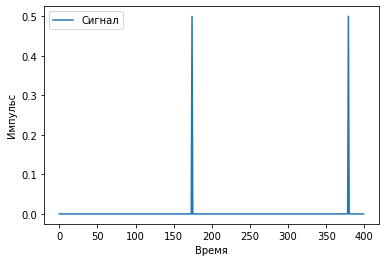

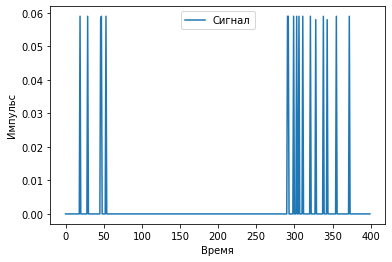

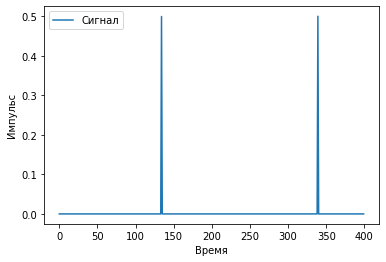

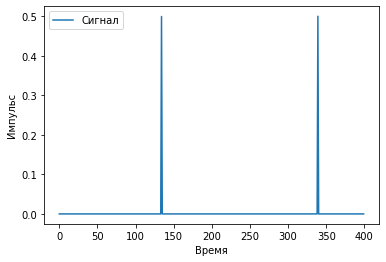

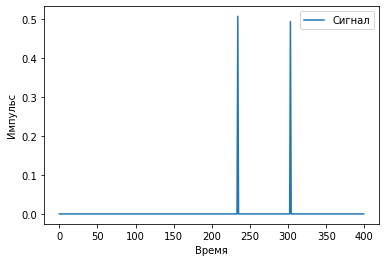

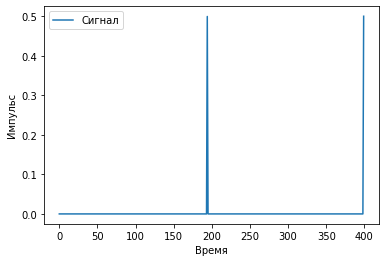

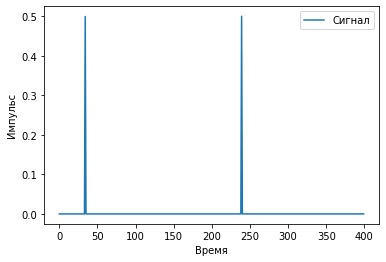

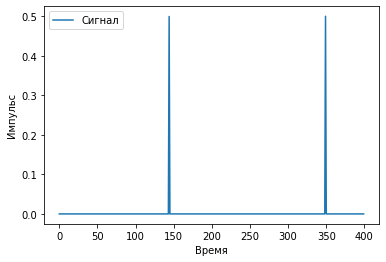

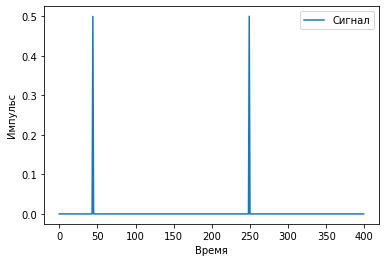

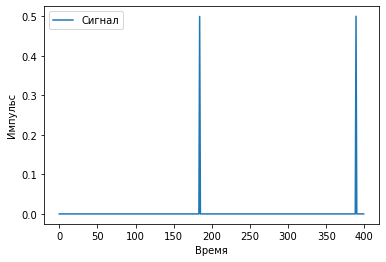

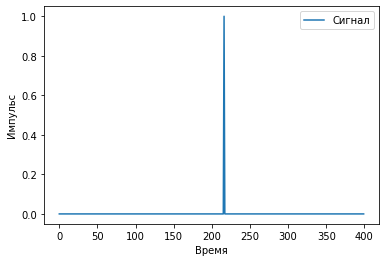

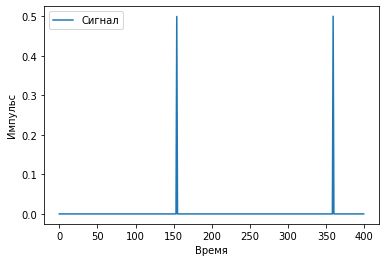

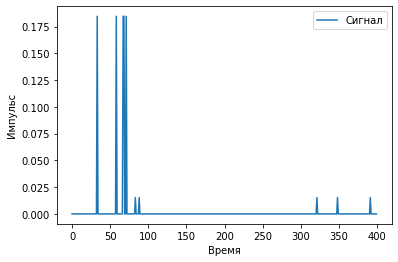

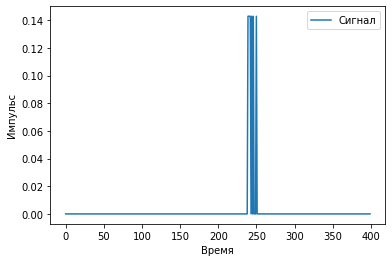

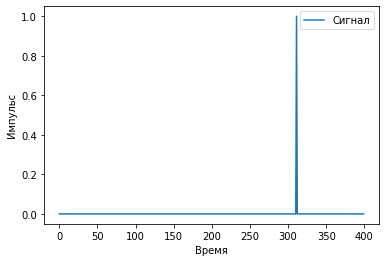

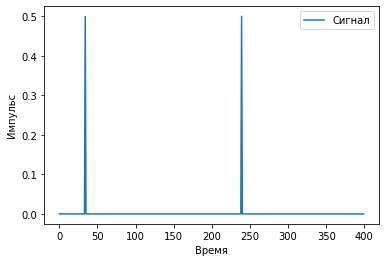

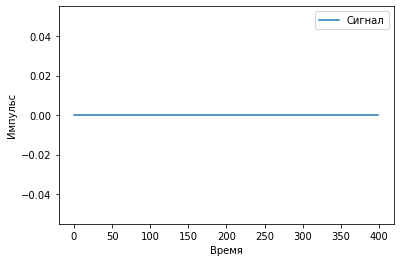

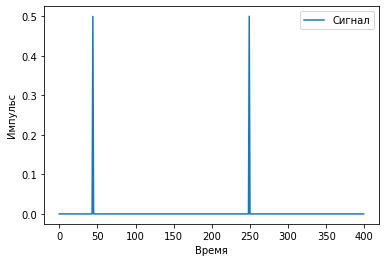

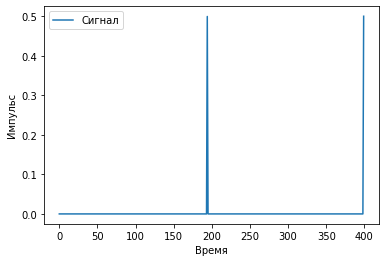

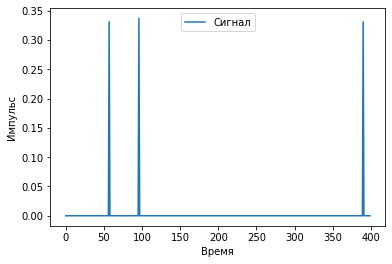

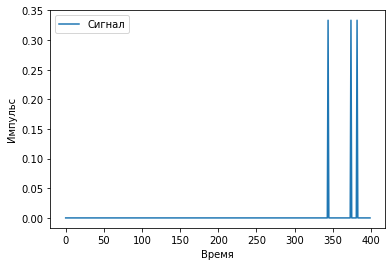

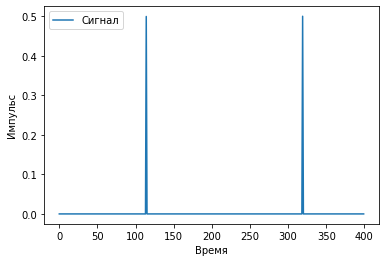

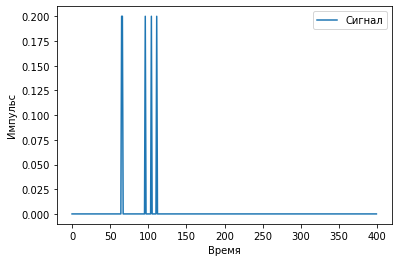

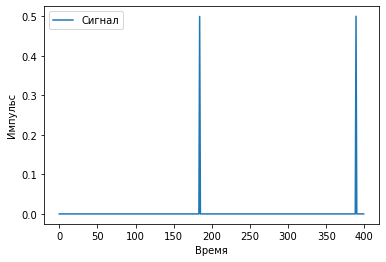

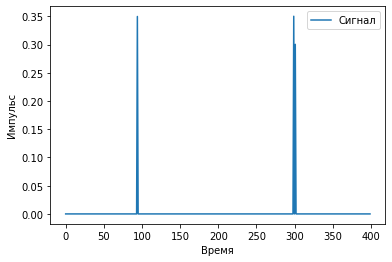

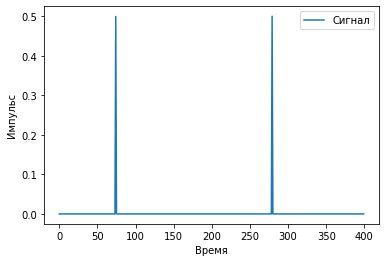

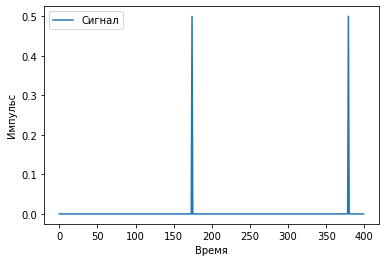

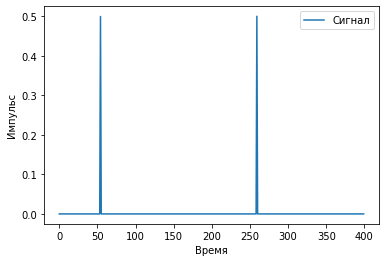

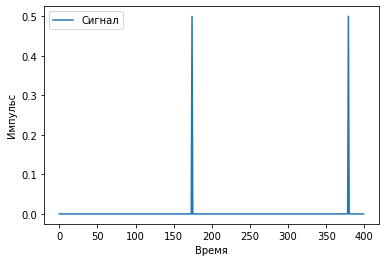

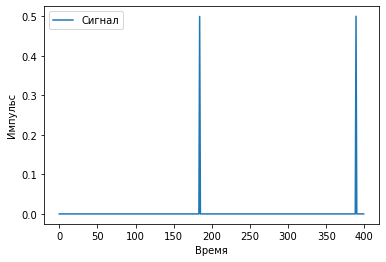

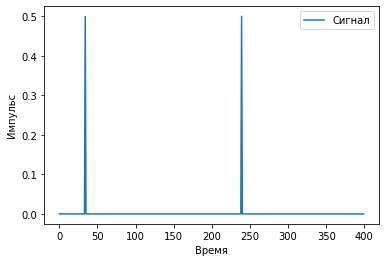

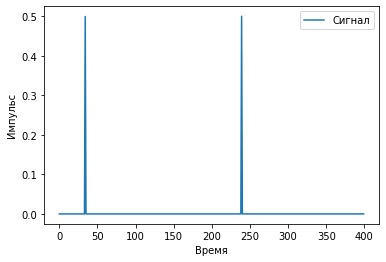

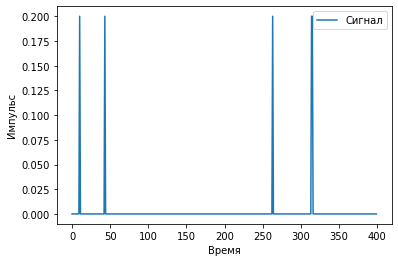

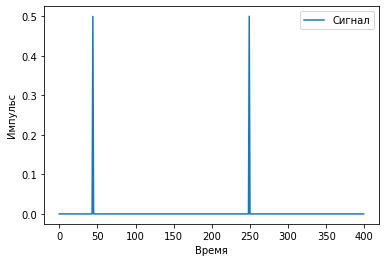

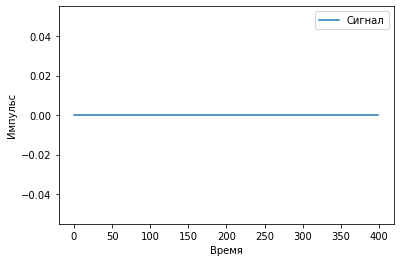

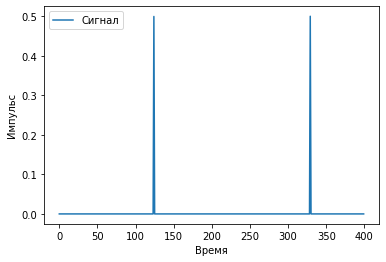

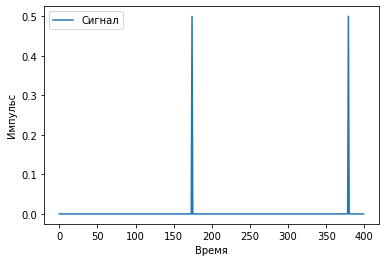

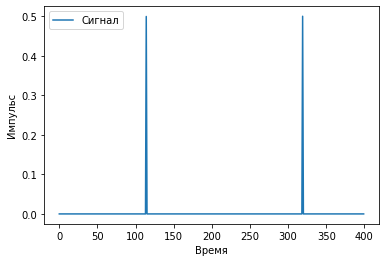

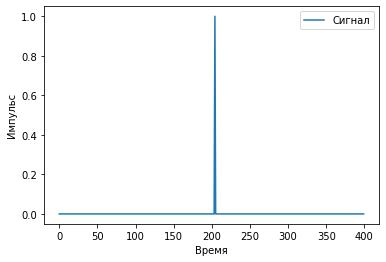

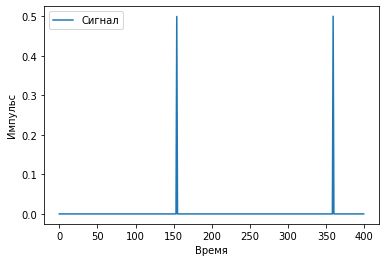

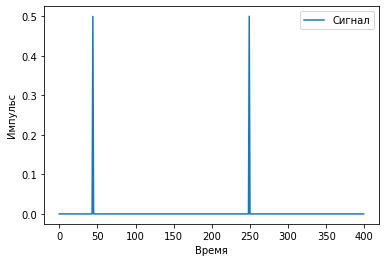

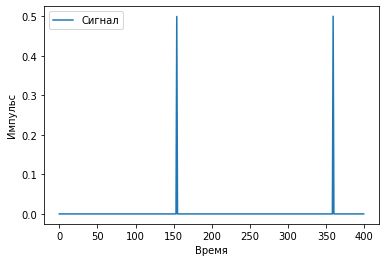

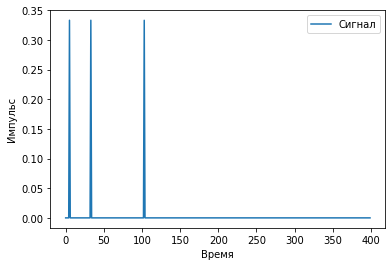

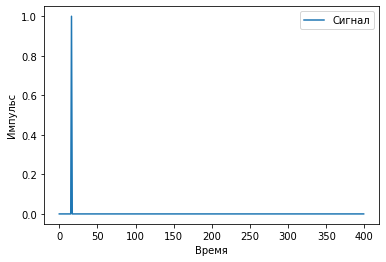

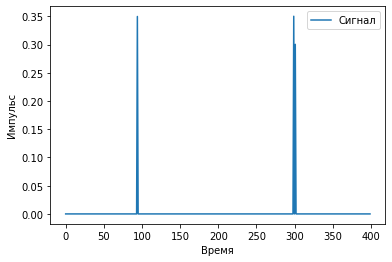

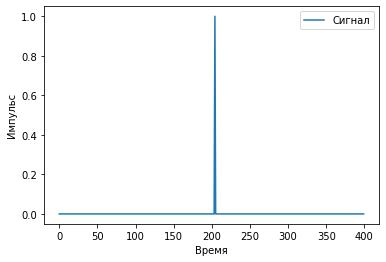

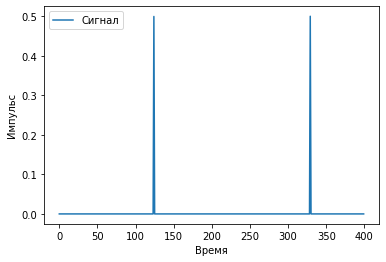

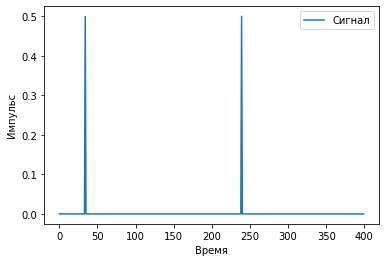

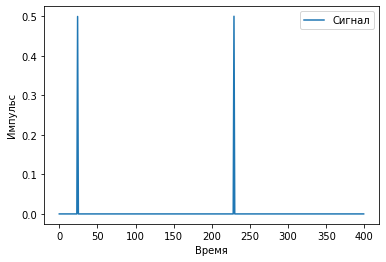

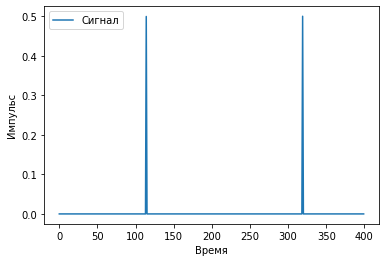

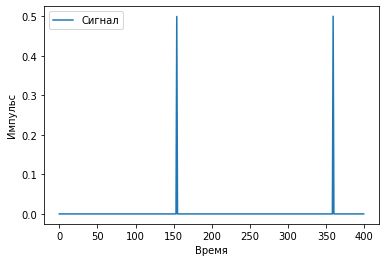

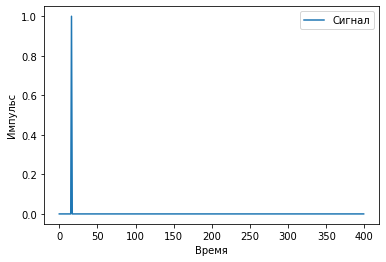

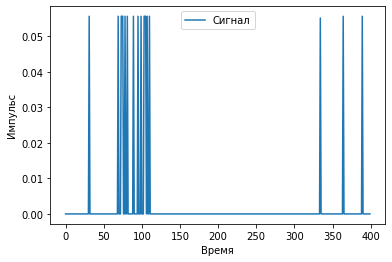

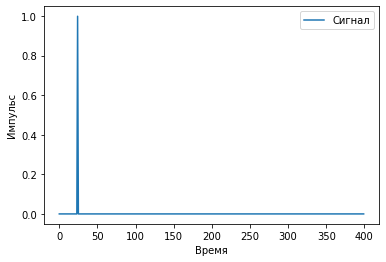

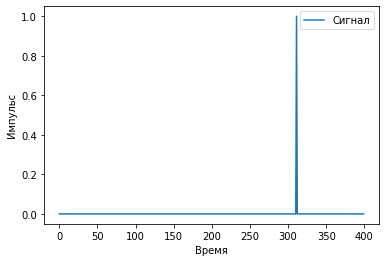

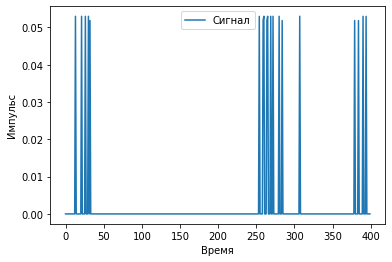

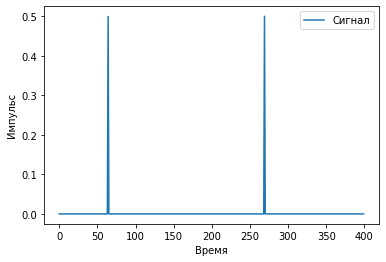

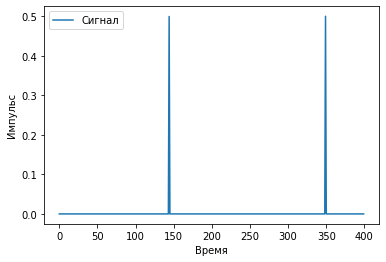

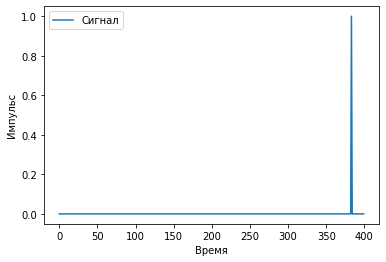

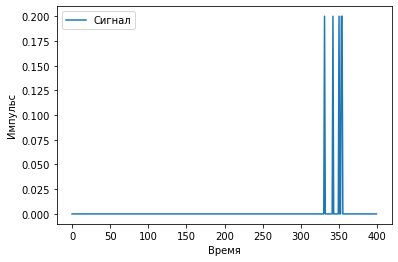

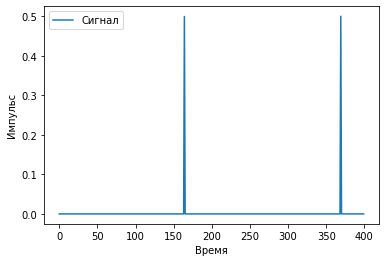

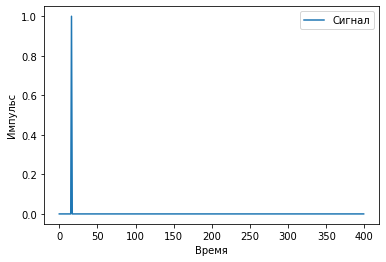

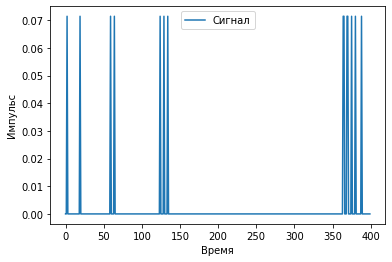

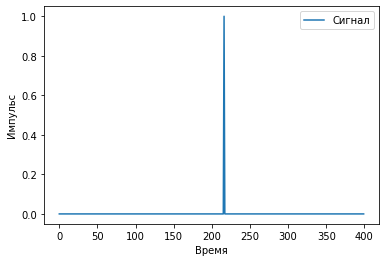

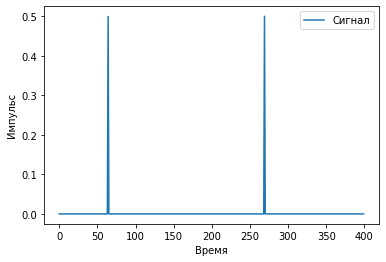

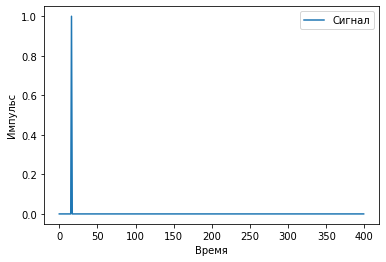

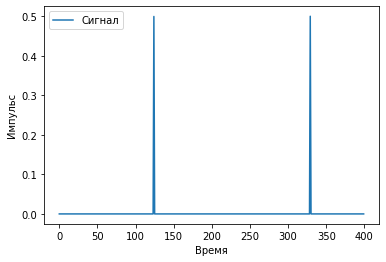

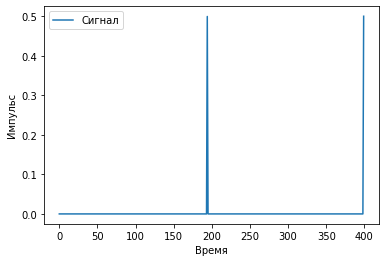

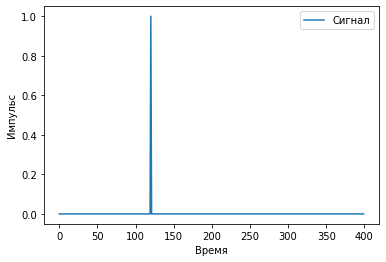

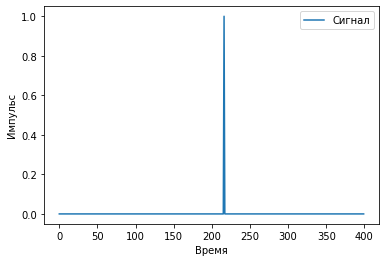

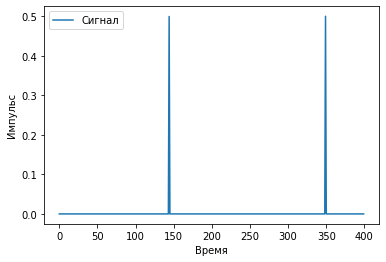

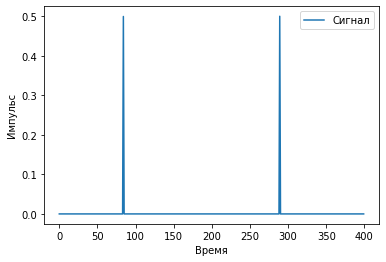

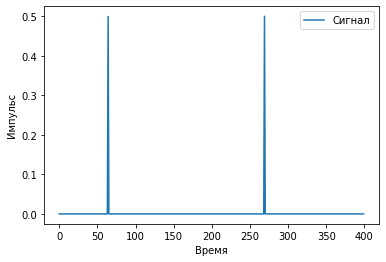

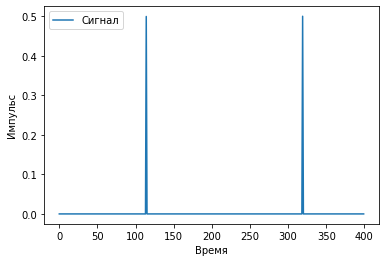

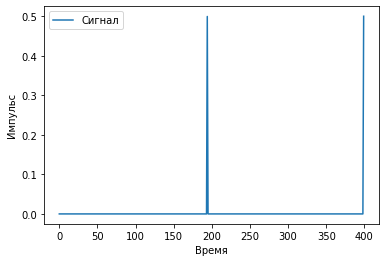

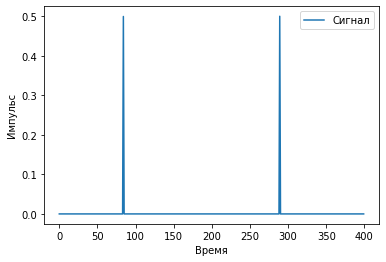

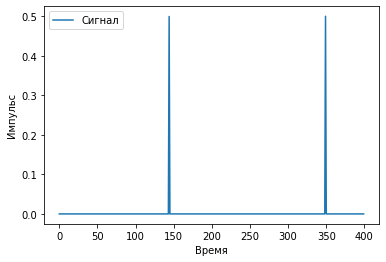

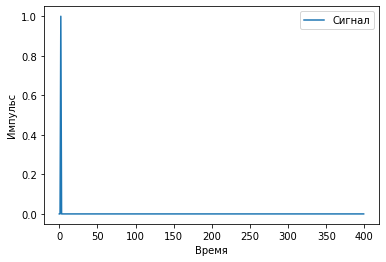

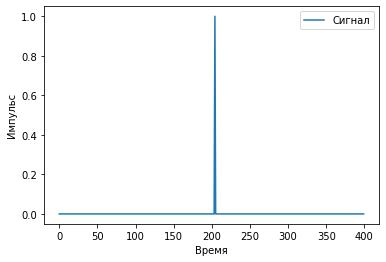

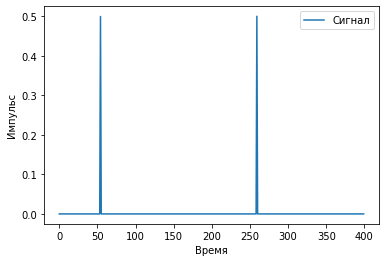

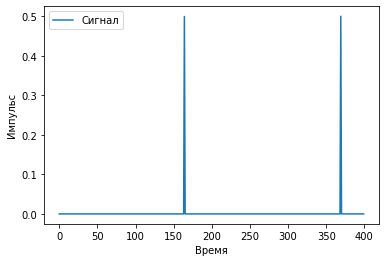

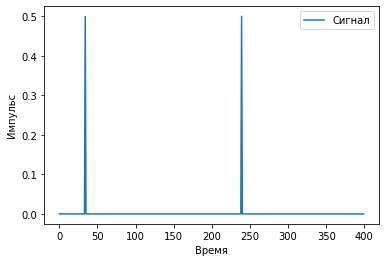

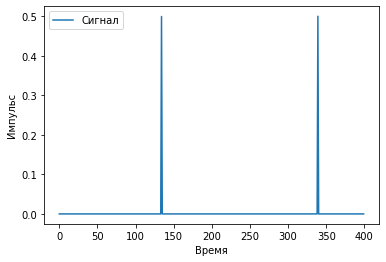

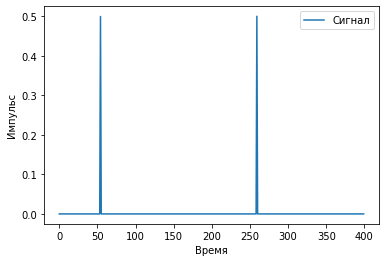

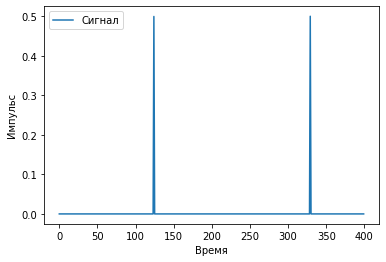

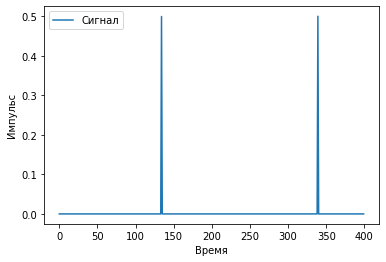

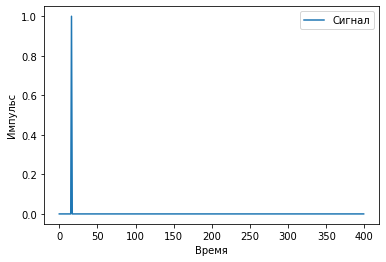

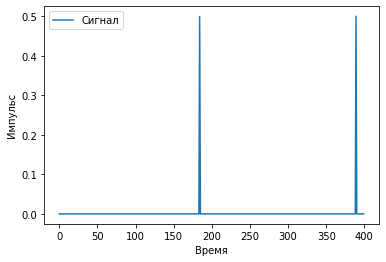

In [128]:
%matplotlib inline

idx = np.random.randint(0, X_train.shape[0], size=100)
for X_i in X_train[idx,:]:
    plt.plot(X_i.reshape(400),
             label='Сигнал')
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

In [129]:
from scipy import signal
import pickle
import sys
import os
from random import shuffle
    
from scipy import signal


def filter_signal(x):
    N = 10
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=Fc, nyq=Fs / 2)
    y = signal.lfilter(h, 1.0, x)
    return y

path = "/Users/antonvasilev/PyCharmProjects/emg-interface/nine_movs_six_sub_split/"

# path where you want to save trained model and some other files
sec_path = "./"
persons = [1, 2, 3, 4, 5, 6]

def create_dataset(file_path, persons, moves=None):
    if (moves is None):
        moves = [0, 1, 2, 3, 4, 5, 6, 7, 8]
    
    path = file_path + "{}_{}.pickle"
    sgn = []
    lbl = []
    for i in persons:
        for j in moves:
            with open(path.format(i, j + 1), "rb") as fp:  # Unpickling
                data = pickle.load(fp)

            for k in range(np.shape(data)[0]):
                sgn.append(data[k])
                lbl.append(j)

    sgn = np.asarray(sgn, dtype=np.float32)
    lbl = np.asarray(lbl, dtype=np.int32)

    c = list(zip(sgn, lbl))
    shuffle(c)
    sgn, lbl = zip(*c)

    sgn = np.asarray(sgn, dtype=np.float64)
    lbl = np.asarray(lbl, dtype=np.int64)

    print(sgn.shape)

    train_signals = sgn[0:int(0.8 * len(sgn))]
    train_labels = lbl[0:int(0.8 * len(lbl))]
    val_signals = sgn[int(0.8 * len(sgn)):]
    val_labels = lbl[int(0.8 * len(lbl)):]
    # test_signals = sgn[int(0.8*len(sgn)):]
    # test_labels = lbl[int(0.8*len(lbl)):]

    train_labels = to_categorical(train_labels)
    val_labels = to_categorical(val_labels)
    # test_labels = to_categorical(test_labels)

    return train_signals, train_labels, val_signals, val_labels

# only two hand moves take in dataset
# moves = [0, 1]
moves = None # All movements

(X_train2,train_labels,__,___ ) = create_dataset(path, persons, moves)

(2820, 400)


(2256, 400)
(2256, 9)


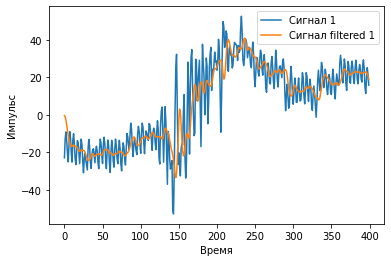

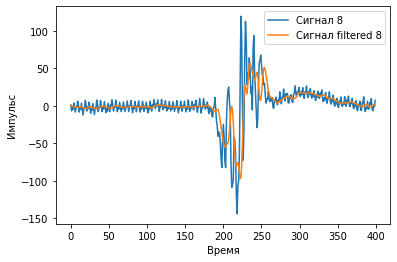

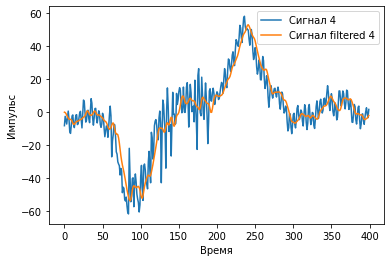

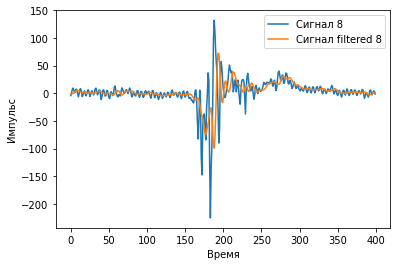

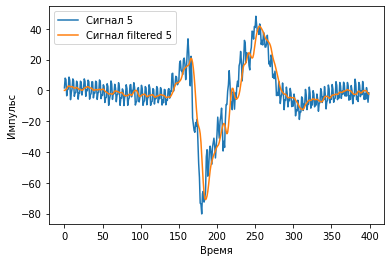

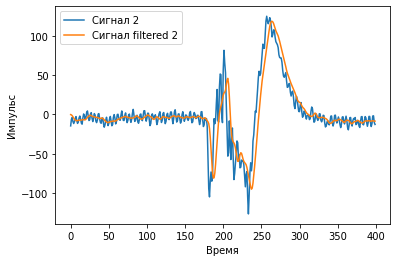

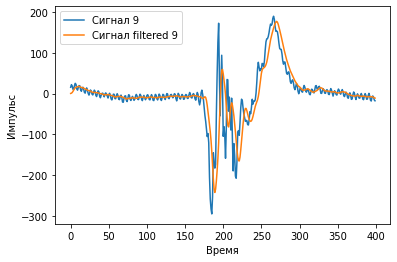

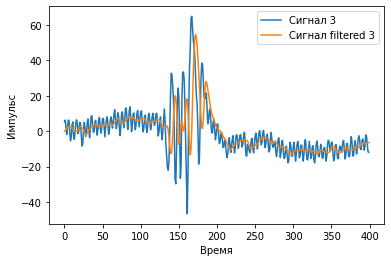

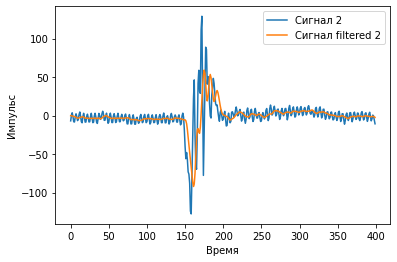

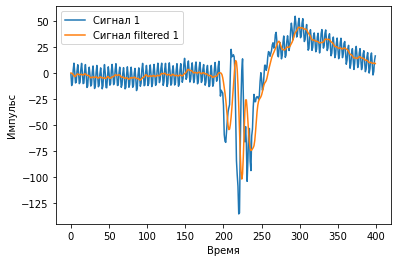

In [130]:
X_train2 = np.array(X_train2)
print(X_train2.shape)
print(train_labels.shape)
idx = np.random.randint(0, X_train2.shape[0], size=10)
X_train_filtered = []
for X in X_train2:
    X_train_filtered.append(filter_signal(X))
X_train_filtered = np.array(X_train_filtered)

for i in idx:
    X_i = X_train2[i]
    plt.plot(X_i,
             label='Сигнал ' + str(np.argmax(train_labels[i]) + 1))
    plt.plot(X_train_filtered[i],
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()


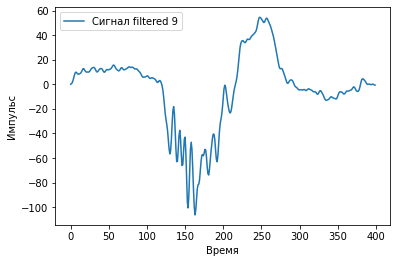

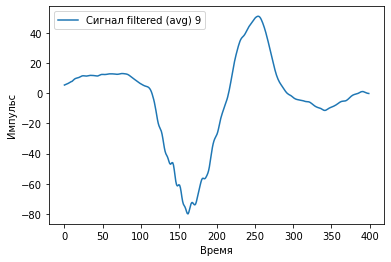

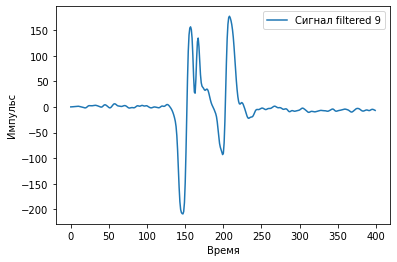

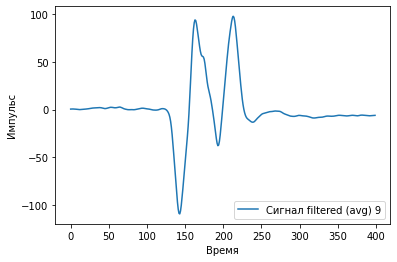

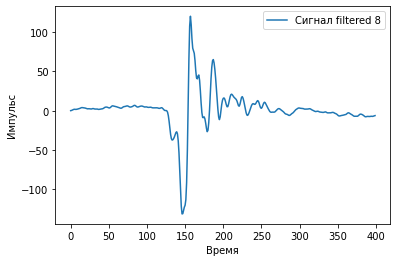

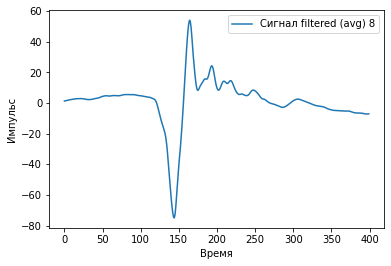

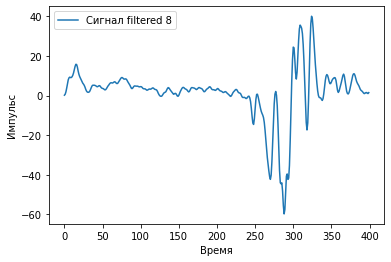

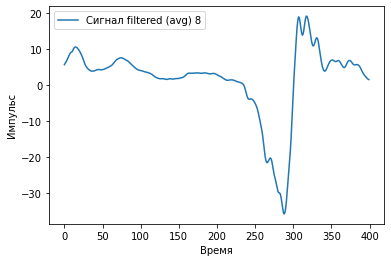

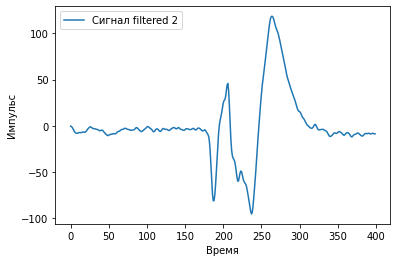

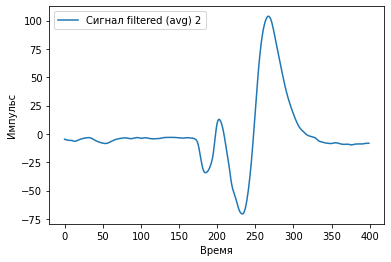

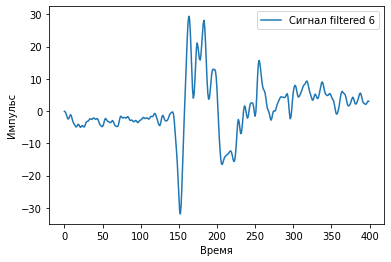

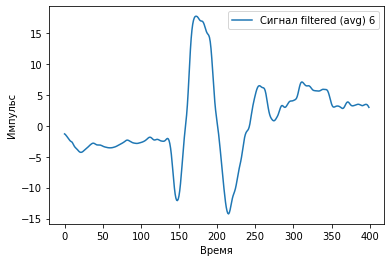

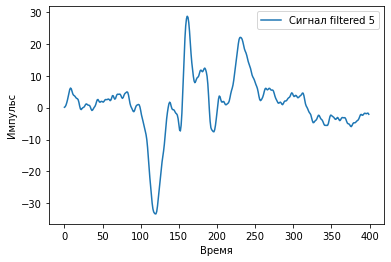

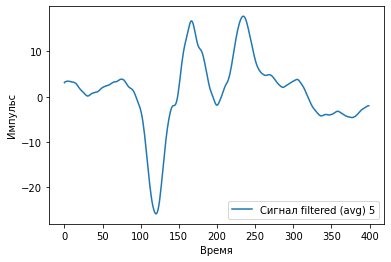

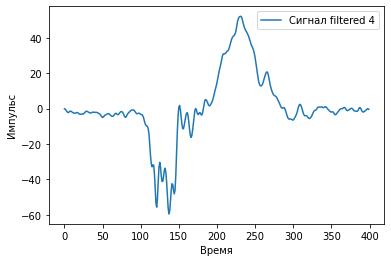

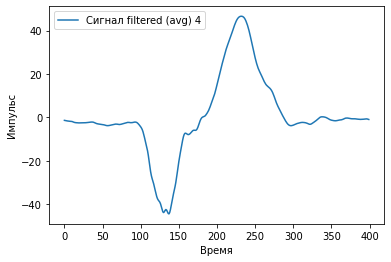

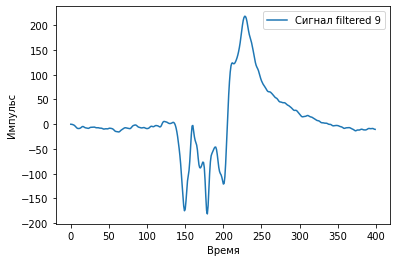

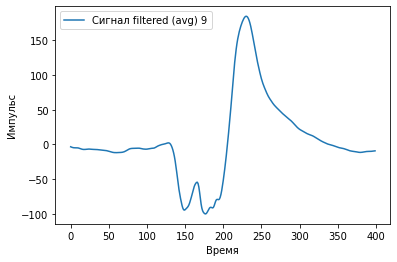

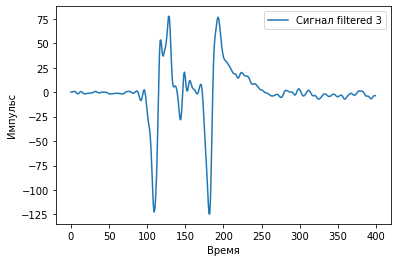

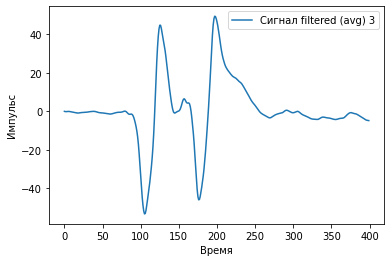

In [163]:
# Moving Average Filter (SMA)
X_train_filtered_sma0 = []
for i0 in range(0, X_train_filtered.shape[0]):
    X_train_filtered_sma = []
    last_index = X_train_filtered[i0].shape[0]

    N = 20
    N_half = int(N / 2)

    for i in range(0, last_index):
        X_average = 0
        X = X_train_filtered[i0]
        if i >= N_half and i <= last_index - N_half:
            for j in range(i - N_half, i + N_half):
                X_average += X[j]
            X_average /= N
        elif i < N_half:
            for j in range(0, i + N_half):
#                 print('+=')
#                 print(X_train_scaled[i0][j])
                X_average += X[j]
            X_average /= (i + N_half)
        else:
            for j in range(i - N_half, last_index):
                X_average += X[j]
            X_average /= (last_index - i + N_half)
    #     print('scaled')
    #     print(X_train_scaled[i])
    #     print('average')
    #     print(X_average)
        X_train_filtered_sma.append(X_average)

#     plt.plot(X_train_scaled[i0],
#              label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()


#     plt.plot(X_train_filtered_sma,
#              label='Сигнал avg ' + str(np.argmax(train_labels[i]) + 1))
#     plt.xlabel('Время')
#     plt.ylabel('Импульс')
#     plt.legend()
#     plt.show()
#     break
    X_train_filtered_sma0.append(X_train_filtered_sma)

idx = np.random.randint(0, X_train2.shape[0], size=10)
for i in idx:
    X_i = X_train_filtered[i]
    plt.plot(X_i,
             label='Сигнал filtered ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_filtered_sma0[i],
             label='Сигнал filtered (avg) ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()

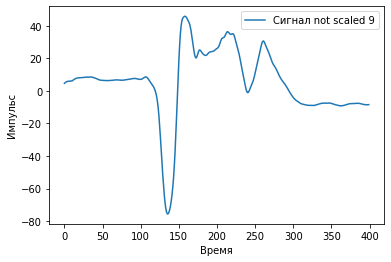

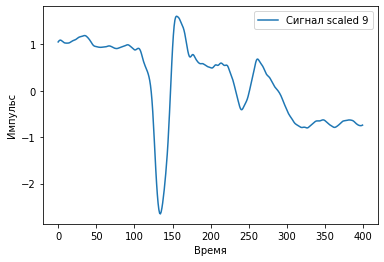

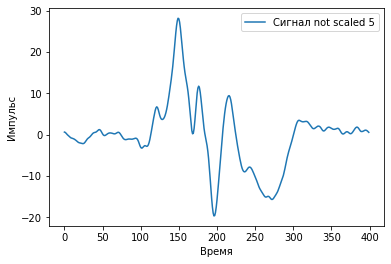

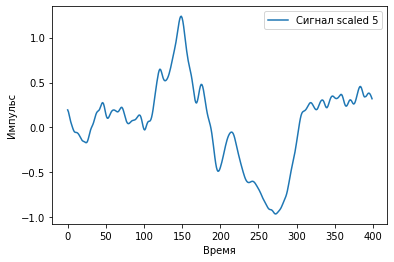

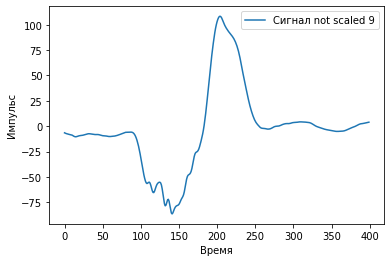

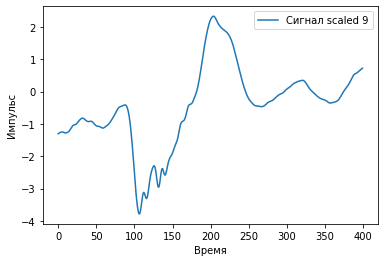

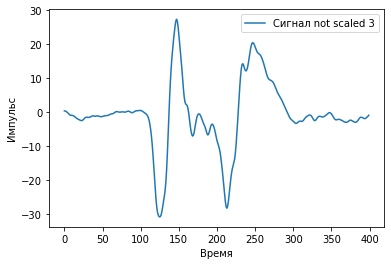

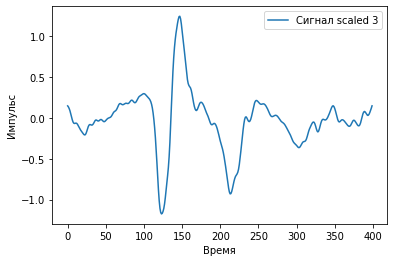

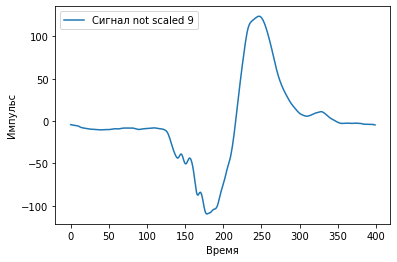

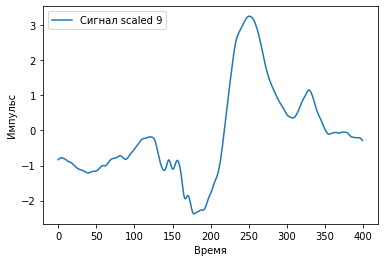

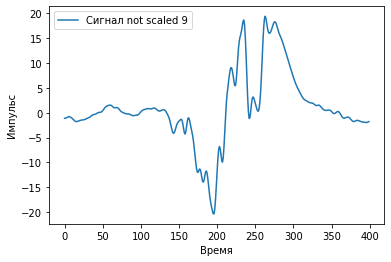

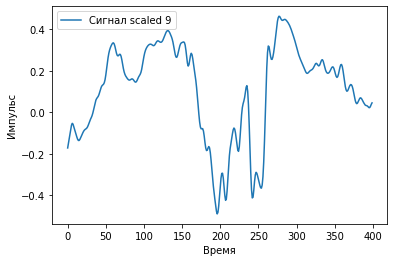

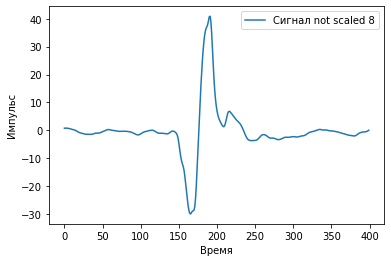

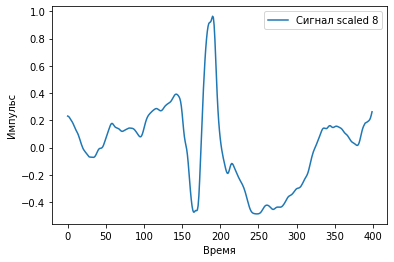

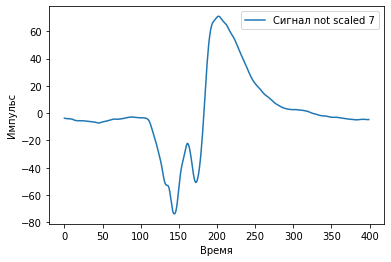

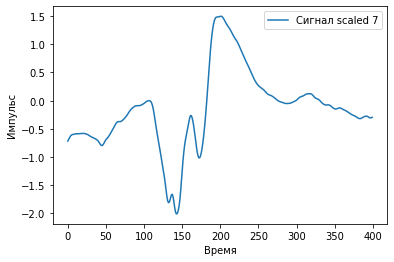

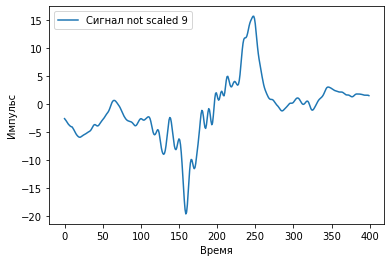

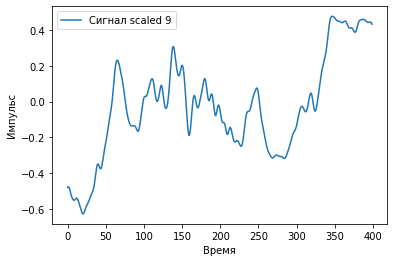

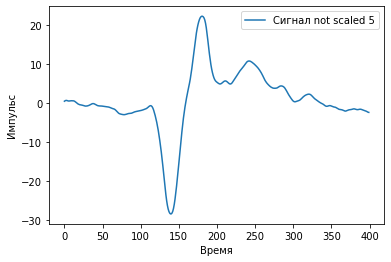

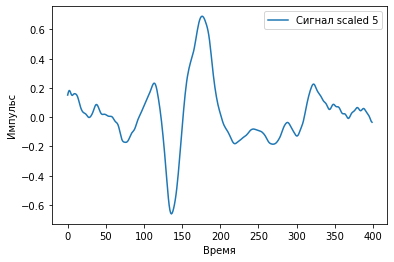

In [164]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

idx = np.random.randint(0, X_train2.shape[0], size=10)

scaler = StandardScaler()
# scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(np.array(X_train_filtered_sma0))
# print(scaled)

for i in idx:
    X_i = X_train_filtered_sma0[i]
    plt.plot(X_i,
             label='Сигнал not scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    
    plt.plot(X_train_scaled[i],
             label='Сигнал scaled ' + str(np.argmax(train_labels[i]) + 1))
    plt.xlabel('Время')
    plt.ylabel('Импульс')
    plt.legend()
    plt.show()
    



In [192]:
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

# Model dense
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

# filtration

# row_sums = X_train_res.sum(axis=1)
# X_train_res = X_train_res / row_sums[:, np.newaxis]

num_classes = Y_train_res.shape[1]
time_series = X_train_res.shape[1]

model_ffnn = Sequential()
# FFNN
model_ffnn.add(Dense(256, input_dim=400, activation='relu'))
model_ffnn.add(Dropout(0.3))
model_ffnn.add(Dense(128, activation='relu'))
model_ffnn.add(Dropout(0.3))
model_ffnn.add(BatchNormalization())
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dropout(0.2))
model_ffnn.add((Dense(32, activation='relu')))
model_ffnn.add(Dropout(0.2))
model_ffnn.add((Dense(32, activation='relu')))
model_ffnn.add(Dropout(0.2))
model_ffnn.add(BatchNormalization())
model_ffnn.add(Dense(num_classes, activation='softmax'))


opt = Adam(learning_rate=0.01)

model_ffnn.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history_ffnn = model_ffnn.fit(X_train_res, Y_train_res, epochs=120, batch_size=100, validation_split=0.3)


Epoch 1/120
16/16 [==============================] - 1s 16ms/step - loss: 2.4372 - accuracy: 0.1501 - val_loss: 4.2665 - val_accuracy: 0.1285
Epoch 2/120
16/16 [==============================] - 0s 5ms/step - loss: 2.1703 - accuracy: 0.1754 - val_loss: 2.9052 - val_accuracy: 0.1713
Epoch 3/120
16/16 [==============================] - 0s 5ms/step - loss: 2.1223 - accuracy: 0.1849 - val_loss: 2.3197 - val_accuracy: 0.1905
Epoch 4/120
16/16 [==============================] - 0s 5ms/step - loss: 2.0693 - accuracy: 0.2134 - val_loss: 2.1717 - val_accuracy: 0.1979
Epoch 5/120
16/16 [==============================] - 0s 5ms/step - loss: 2.0394 - accuracy: 0.2337 - val_loss: 2.1152 - val_accuracy: 0.2053
Epoch 6/120
16/16 [==============================] - 0s 5ms/step - loss: 2.0199 - accuracy: 0.2400 - val_loss: 2.0320 - val_accuracy: 0.2304
Epoch 7/120
16/16 [==============================] - 0s 5ms/step - loss: 2.0042 - accuracy: 0.2362 - val_loss: 1.9840 - val_accuracy: 0.2393
Epoch 8/120


Epoch 59/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4916 - accuracy: 0.4522 - val_loss: 1.5966 - val_accuracy: 0.4298
Epoch 60/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4591 - accuracy: 0.4427 - val_loss: 1.5645 - val_accuracy: 0.4106
Epoch 61/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4464 - accuracy: 0.4617 - val_loss: 1.5849 - val_accuracy: 0.4298
Epoch 62/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4482 - accuracy: 0.4592 - val_loss: 1.5825 - val_accuracy: 0.4225
Epoch 63/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4767 - accuracy: 0.4364 - val_loss: 1.5757 - val_accuracy: 0.4431
Epoch 64/120
16/16 [==============================] - 0s 4ms/step - loss: 1.4698 - accuracy: 0.4319 - val_loss: 1.6057 - val_accuracy: 0.4151
Epoch 65/120
16/16 [==============================] - 0s 5ms/step - loss: 1.4772 - accuracy: 0.4389 - val_loss: 1.5690 - val_accuracy: 0.4402
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 1.2983 - accuracy: 0.5168 - val_loss: 1.5319 - val_accuracy: 0.4609
Epoch 117/120
16/16 [==============================] - 0s 4ms/step - loss: 1.2905 - accuracy: 0.5174 - val_loss: 1.5588 - val_accuracy: 0.4417
Epoch 118/120
16/16 [==============================] - 0s 4ms/step - loss: 1.2670 - accuracy: 0.5301 - val_loss: 1.5148 - val_accuracy: 0.4623
Epoch 119/120
16/16 [==============================] - 0s 4ms/step - loss: 1.2555 - accuracy: 0.5491 - val_loss: 1.5511 - val_accuracy: 0.4372
Epoch 120/120
16/16 [==============================] - 0s 4ms/step - loss: 1.2749 - accuracy: 0.5326 - val_loss: 1.5704 - val_accuracy: 0.4284


In [208]:
# Conv1D
from keras.layers import Conv1D
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten, GlobalAveragePooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Model dense
# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

# filtration

# row_sums = X_train_res.sum(axis=1)
# X_train_res = X_train_res / row_sums[:, np.newaxis]

num_classes = Y_train_res.shape[1]
time_series = X_train_res.shape[1]
INPUT_SIZE = time_series
num_sensors = 1

model_conv1 = Sequential()
# Conv1d
model_conv1.add(Reshape((INPUT_SIZE, num_sensors), input_shape=(INPUT_SIZE,)))
model_conv1.add(Conv1D(25, 80, activation='relu', input_shape=(INPUT_SIZE, num_sensors)))
model_conv1.add(Conv1D(25, 6, activation='relu'))
model_conv1.add(MaxPooling1D(3))
model_conv1.add(Conv1D(16, 6, activation='relu'))
model_conv1.add(Conv1D(12, 4, activation='relu'))
model_conv1.add(GlobalAveragePooling1D())
model_conv1.add(Dropout(0.5))
model_conv1.add(Dense(num_classes, activation='softmax'))



opt = Adam(learning_rate=0.01)

model_conv1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early
callbacks_list = [
    ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='accuracy', patience=1)
]

# Train the model, iterating on the data in batches of 32 samples
history_conv1 = model_conv1.fit(X_train_res, Y_train_res, epochs=120, batch_size=100, validation_split=0.3
#                                 , callbacks=callbacks_list
                               )


Epoch 1/120
16/16 [==============================] - 1s 54ms/step - loss: 2.1912 - accuracy: 0.1184 - val_loss: 2.1799 - val_accuracy: 0.1241
Epoch 2/120
16/16 [==============================] - 1s 41ms/step - loss: 2.1813 - accuracy: 0.1355 - val_loss: 2.1603 - val_accuracy: 0.1492
Epoch 3/120
16/16 [==============================] - 1s 40ms/step - loss: 2.1489 - accuracy: 0.1457 - val_loss: 2.1147 - val_accuracy: 0.1625
Epoch 4/120
16/16 [==============================] - 1s 42ms/step - loss: 2.1398 - accuracy: 0.1609 - val_loss: 2.1084 - val_accuracy: 0.1669
Epoch 5/120
16/16 [==============================] - 1s 40ms/step - loss: 2.1162 - accuracy: 0.1767 - val_loss: 2.0712 - val_accuracy: 0.1699
Epoch 6/120
16/16 [==============================] - 1s 43ms/step - loss: 2.1106 - accuracy: 0.1761 - val_loss: 2.0563 - val_accuracy: 0.1713
Epoch 7/120
16/16 [==============================] - 1s 42ms/step - loss: 2.0998 - accuracy: 0.1805 - val_loss: 2.0629 - val_accuracy: 0.1699
Epoch 

16/16 [==============================] - 1s 45ms/step - loss: 1.7216 - accuracy: 0.3471 - val_loss: 1.8379 - val_accuracy: 0.3323
Epoch 59/120
16/16 [==============================] - 1s 43ms/step - loss: 1.7852 - accuracy: 0.3268 - val_loss: 1.8229 - val_accuracy: 0.3250
Epoch 60/120
16/16 [==============================] - 1s 43ms/step - loss: 1.7426 - accuracy: 0.3350 - val_loss: 1.8267 - val_accuracy: 0.3560
Epoch 61/120
16/16 [==============================] - 1s 41ms/step - loss: 1.7298 - accuracy: 0.3369 - val_loss: 1.8437 - val_accuracy: 0.3501
Epoch 62/120
16/16 [==============================] - 1s 41ms/step - loss: 1.7462 - accuracy: 0.3262 - val_loss: 1.8512 - val_accuracy: 0.3161
Epoch 63/120
16/16 [==============================] - 1s 41ms/step - loss: 1.7308 - accuracy: 0.3414 - val_loss: 1.8155 - val_accuracy: 0.3383
Epoch 64/120
16/16 [==============================] - 1s 43ms/step - loss: 1.7176 - accuracy: 0.3471 - val_loss: 1.8647 - val_accuracy: 0.3279
Epoch 65/120

16/16 [==============================] - 1s 63ms/step - loss: 1.5526 - accuracy: 0.4079 - val_loss: 1.8488 - val_accuracy: 0.3678
Epoch 116/120
16/16 [==============================] - 1s 50ms/step - loss: 1.5620 - accuracy: 0.4028 - val_loss: 1.8234 - val_accuracy: 0.3708
Epoch 117/120
16/16 [==============================] - 1s 49ms/step - loss: 1.5313 - accuracy: 0.4155 - val_loss: 1.8303 - val_accuracy: 0.3501
Epoch 118/120
16/16 [==============================] - 1s 52ms/step - loss: 1.5453 - accuracy: 0.4060 - val_loss: 1.9141 - val_accuracy: 0.3560
Epoch 119/120
16/16 [==============================] - 1s 50ms/step - loss: 1.5262 - accuracy: 0.4009 - val_loss: 1.8452 - val_accuracy: 0.3604
Epoch 120/120
16/16 [==============================] - 1s 50ms/step - loss: 1.5532 - accuracy: 0.4053 - val_loss: 1.8405 - val_accuracy: 0.3427


In [193]:
# Model LSTM
from keras.optimizers import Adam
from keras.layers import TimeDistributed, Flatten

# X_train_res = X_train
# Y_train_res = one_hot_labels
X_train_res = X_train_scaled # X_train_filtered # X_train2
Y_train_res = train_labels

# filtration

# row_sums = X_train_res.sum(axis=1)
# X_train_res = X_train_res / row_sums[:, np.newaxis]

num_classes = Y_train_res.shape[1]
time_series = X_train_res.shape[1]

model = Sequential()
# RNN
model.add(Reshape((40, 10), input_shape=(400,)))
model.add(LSTM(units=64,return_sequences=True,input_shape=(None, 40, 10)))
model.add(Dropout(0.2))
# model.add(LSTM(units=16,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# FFNN
# model.add(Dense(256, input_dim=400, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Flatten())
model.add((Dense(32, activation='relu')))
model.add(Dropout(0.2))
model.add((Dense(32, activation='relu')))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))


opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train_res, Y_train_res, epochs=120, batch_size=100, validation_split=0.3)


Epoch 1/120
16/16 [==============================] - 4s 59ms/step - loss: 2.4424 - accuracy: 0.1501 - val_loss: 2.1739 - val_accuracy: 0.1713
Epoch 2/120
16/16 [==============================] - 0s 26ms/step - loss: 2.2873 - accuracy: 0.2020 - val_loss: 2.1513 - val_accuracy: 0.2157
Epoch 3/120
16/16 [==============================] - 0s 26ms/step - loss: 2.1696 - accuracy: 0.2331 - val_loss: 2.1074 - val_accuracy: 0.2171
Epoch 4/120
16/16 [==============================] - 0s 25ms/step - loss: 2.1196 - accuracy: 0.2324 - val_loss: 2.0773 - val_accuracy: 0.2496
Epoch 5/120
16/16 [==============================] - 0s 25ms/step - loss: 2.0449 - accuracy: 0.2552 - val_loss: 2.0493 - val_accuracy: 0.2718
Epoch 6/120
16/16 [==============================] - 0s 26ms/step - loss: 1.9958 - accuracy: 0.2590 - val_loss: 2.0333 - val_accuracy: 0.2880
Epoch 7/120
16/16 [==============================] - 0s 25ms/step - loss: 1.9665 - accuracy: 0.2761 - val_loss: 2.0087 - val_accuracy: 0.2866
Epoch 

16/16 [==============================] - 0s 26ms/step - loss: 0.9623 - accuracy: 0.6643 - val_loss: 1.3874 - val_accuracy: 0.5362
Epoch 59/120
16/16 [==============================] - 0s 27ms/step - loss: 0.9311 - accuracy: 0.6789 - val_loss: 1.3738 - val_accuracy: 0.5421
Epoch 60/120
16/16 [==============================] - 0s 26ms/step - loss: 0.9545 - accuracy: 0.6593 - val_loss: 1.4055 - val_accuracy: 0.5303
Epoch 61/120
16/16 [==============================] - 0s 26ms/step - loss: 0.9049 - accuracy: 0.6833 - val_loss: 1.3913 - val_accuracy: 0.5332
Epoch 62/120
16/16 [==============================] - 0s 25ms/step - loss: 0.9015 - accuracy: 0.6871 - val_loss: 1.3878 - val_accuracy: 0.5362
Epoch 63/120
16/16 [==============================] - 0s 26ms/step - loss: 0.9081 - accuracy: 0.6840 - val_loss: 1.3914 - val_accuracy: 0.5421
Epoch 64/120
16/16 [==============================] - 0s 25ms/step - loss: 0.8787 - accuracy: 0.6985 - val_loss: 1.4151 - val_accuracy: 0.5465
Epoch 65/120

16/16 [==============================] - 0s 27ms/step - loss: 0.4941 - accuracy: 0.8391 - val_loss: 1.4767 - val_accuracy: 0.5894
Epoch 116/120
16/16 [==============================] - 0s 26ms/step - loss: 0.4448 - accuracy: 0.8455 - val_loss: 1.4785 - val_accuracy: 0.5908
Epoch 117/120
16/16 [==============================] - 0s 26ms/step - loss: 0.4753 - accuracy: 0.8518 - val_loss: 1.5150 - val_accuracy: 0.5716
Epoch 118/120
16/16 [==============================] - 0s 27ms/step - loss: 0.4505 - accuracy: 0.8594 - val_loss: 1.5300 - val_accuracy: 0.5716
Epoch 119/120
16/16 [==============================] - 0s 27ms/step - loss: 0.4731 - accuracy: 0.8505 - val_loss: 1.5114 - val_accuracy: 0.5953
Epoch 120/120
16/16 [==============================] - 0s 25ms/step - loss: 0.4422 - accuracy: 0.8499 - val_loss: 1.5233 - val_accuracy: 0.5790


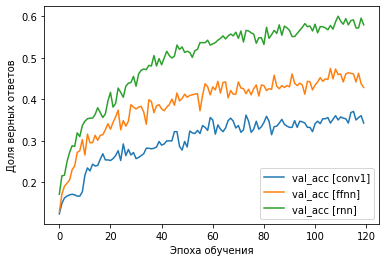

In [209]:
plt.plot(history_conv1.history['val_accuracy'],
        label='val_acc [conv1]')
# plt.plot(history_ffnn.history['accuracy'],
#          label='val [ffnn]')
plt.plot(history_ffnn.history['val_accuracy'],
         label='val_acc [ffnn]')


# plt.plot(history.history['accuracy'],
#          label='val [rnn]')
plt.plot(history.history['val_accuracy'],
         label='val_acc [rnn]')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.savefig('simple_rnn_history_with_2_moves_normal_data.png')

In [195]:
# compare models
print('accurace ffnn')
print(model_ffnn.evaluate(X_train_res, Y_train_res)[1])
print('accurace rnn')
print(model.evaluate(X_train_res, Y_train_res)[1])

accurace ffnn
71/71 [==============================] - 0s 1ms/step - loss: 1.1083 - accuracy: 0.6068
0.6068262457847595
accurace rnn
71/71 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.8493
0.8492907881736755


804
1/1 [==============================] - 2s 2s/step
[[ 0.         -0.         -0.          0.         -0.          0.
  -0.          0.          0.         -0.          0.         -0.
  -0.          0.         -0.          0.         -0.         -0.
  -0.         -0.          0.          0.          0.          0.
   0.          0.         -0.         -0.          0.         -0.
   0.         -0.         -0.         -0.          0.49970905  0.
   0.         -0.          0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.     

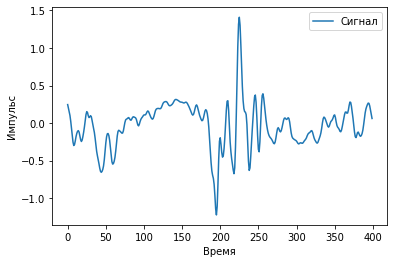

In [134]:
index = np.random.randint(0, X_train_res.shape[0] - 1, 1)[0]
print(index)
y_pred = model.predict(np.array(X_train_res[index:index+1]))
print(X_train[index:index+1])
# print('X_pred')
# print(X_train[0:1])
print('y_pred')
print(y_pred)
print('y_real')
print(Y_train_res[index])
print('Is corrrect?')
print(np.argmax(y_pred) == np.argmax(Y_train_res[index]))

plt.plot(X_train_res[index],
         label='Сигнал')
plt.xlabel('Время')
plt.ylabel('Импульс')
plt.legend()
plt.savefig('emg_example.png')